# Convolutional Neural Netwoks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## 1. Data Preprocessing

### Preprocessing the Training Set

In [2]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
    "dataset/training_set",
    target_size=(64,64),
    batch_size=32,
    class_mode="binary")

Found 8001 images belonging to 2 classes.


### Preprocessing the Test Set

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    "dataset/test_set",
    target_size=(64,64),
    batch_size=32,
    class_mode="binary")

Found 2000 images belonging to 2 classes.


## 2. Building the CNN

### Initialising the CNN

In [4]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape = [64,64,3]))

### Step 2 - Pooling

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a Second Convolutional Layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

### Step 3 - Flattening

In [8]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [9]:
cnn.add(tf.keras.layers.Dense(units=128,activation="relu"))

### Step 5 - Output Layer

In [10]:
cnn.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

## 3. Training the CNN

### Compiling the CNN

In [11]:
cnn.compile(optimizer="adam",loss="binary_crossentropy", metrics= ["accuracy"])

### Training the CNN

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor = "val_loss",
    patience = 10,
    restore_best_weights=True)
    
history = cnn.fit(training_set, validation_data=test_set, epochs=50, callbacks=[early_stop])

Epoch 1/50
251/251 [==============================] - 27s 100ms/step - loss: 0.6721 - accuracy: 0.5912 - val_loss: 0.6280 - val_accuracy: 0.6955
Epoch 2/50
251/251 [==============================] - 25s 99ms/step - loss: 0.6046 - accuracy: 0.6755 - val_loss: 0.5662 - val_accuracy: 0.7175
Epoch 3/50
251/251 [==============================] - 25s 99ms/step - loss: 0.5597 - accuracy: 0.7080 - val_loss: 0.5335 - val_accuracy: 0.7285
Epoch 4/50
251/251 [==============================] - 25s 101ms/step - loss: 0.5410 - accuracy: 0.7200 - val_loss: 0.5975 - val_accuracy: 0.6925
Epoch 5/50
251/251 [==============================] - 25s 99ms/step - loss: 0.5164 - accuracy: 0.7413 - val_loss: 0.4905 - val_accuracy: 0.7635
Epoch 6/50
251/251 [==============================] - 25s 101ms/step - loss: 0.5031 - accuracy: 0.7547 - val_loss: 0.5203 - val_accuracy: 0.7390
Epoch 7/50
251/251 [==============================] - 26s 104ms/step - loss: 0.4886 - accuracy: 0.7600 - val_loss: 0.4777 - val_accur

## 4. Making Prediction

In [13]:
from tensorflow.keras.preprocessing import image

test_image = image.load_img("dataset/single_prediction/dog.jpg", target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = "dog"
else:
    prediction = "cat"

print(prediction)

1/1 [==============================] - 0s 76ms/step
dog


## 5. Visualizations

63/63 [==============================] - 4s 58ms/step


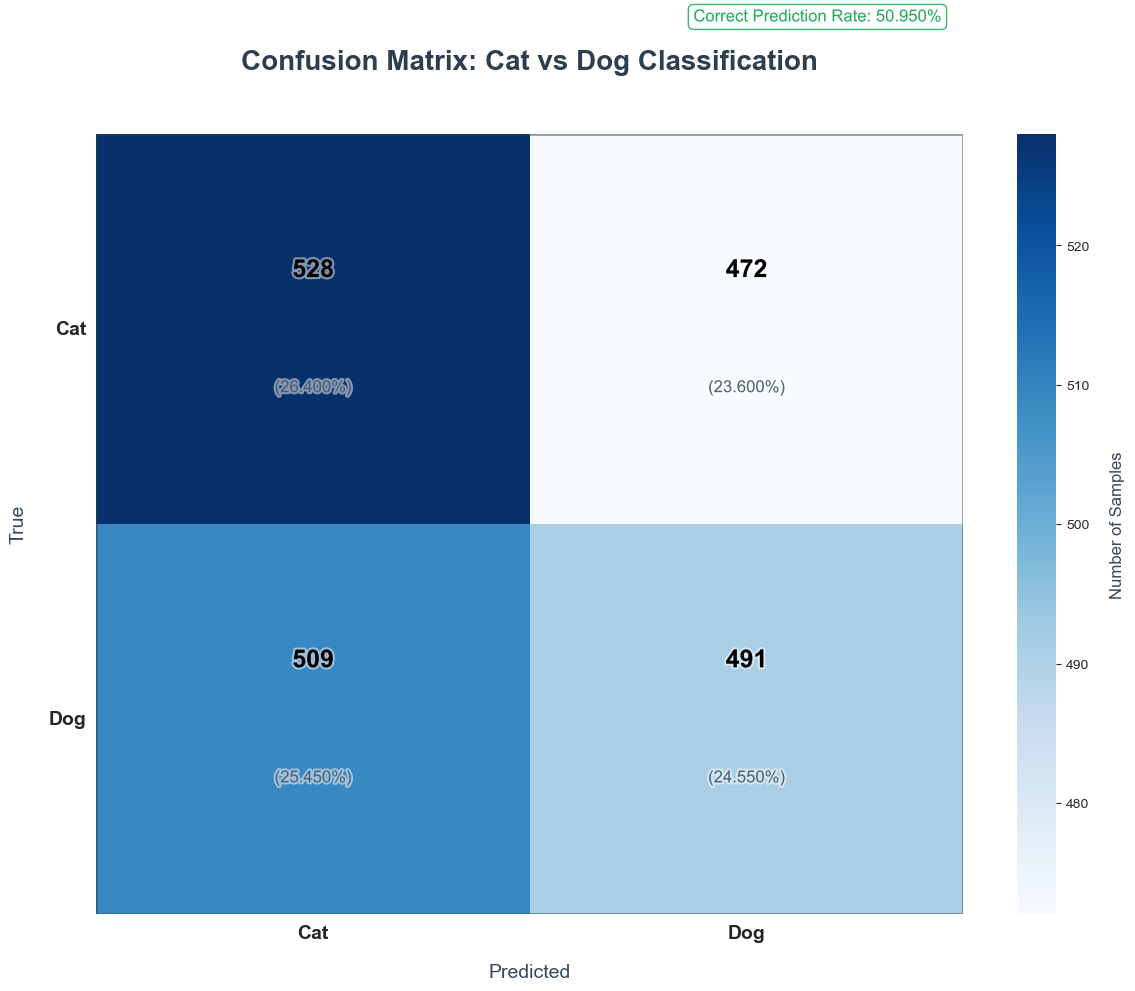

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.patheffects as pe
# Get predictions from the test set
y_pred = cnn.predict(test_set)
y_pred = (y_pred > 0.5).astype(int)
y_true = test_set.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate total number of samples
total_samples = np.sum(cm)

# Calculate the percentages
cm_percent = cm / total_samples * 100

# Plotting
plt.figure(figsize=(12, 10))
sns.set_style("whitegrid", {'axes.edgecolor': '.8', 'grid.color': '.8'})

# Heatmap
ax = sns.heatmap(cm, annot=False, cmap='Blues', cbar=True, 
                 xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])

# Add custom annotations (number + percentage)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j + 0.5, i + 0.35, f'{cm[i, j]}', 
                 ha='center', va='center', fontsize=18, fontweight='bold', color='black')
        plt.text(j + 0.5, i + 0.65, f'({cm_percent[i, j]:.3f}%)', 
                 ha='center', va='center', fontsize=12, color='#34495e', alpha=0.8)

# Customize the color bar
cbar = ax.collections[0].colorbar
cbar.set_label('Number of Samples', fontsize=12, labelpad=15, color="#34495e")
cbar.ax.tick_params(labelsize=10)

# Title and labels
plt.title("Confusion Matrix: Cat vs Dog Classification\n", 
          fontsize=20, pad=25, color="#2c3e50", fontweight="bold")
plt.xlabel("Predicted", fontsize=14, labelpad=15, color="#34495e")
plt.ylabel("True", fontsize=14, labelpad=15, color="#34495e")
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold', rotation=0)

# Background color and frame
plt.gca().set_facecolor('#f8f9fa')
plt.gca().add_patch(plt.Rectangle((0, 0), 2, 2, fill=False, edgecolor='#2c3e50', lw=2, alpha=0.5))

# Additional info annotation (correct prediction rate)
accuracy = np.trace(cm) / total_samples
plt.text(1.95, -0.3, f'Correct Prediction Rate: {accuracy:.3%}', 
         ha='right', va='center', fontsize=12, color="#27ae60", 
         bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#27ae60", alpha=0.9))

# Shadow effect (optional)
for text in ax.texts:
    text.set_path_effects([pe.withStroke(linewidth=3, foreground='white', alpha=0.5)])

# Fine-tuning the layout
plt.tight_layout()
plt.savefig("results/confusion_matrix.png")
plt.show()


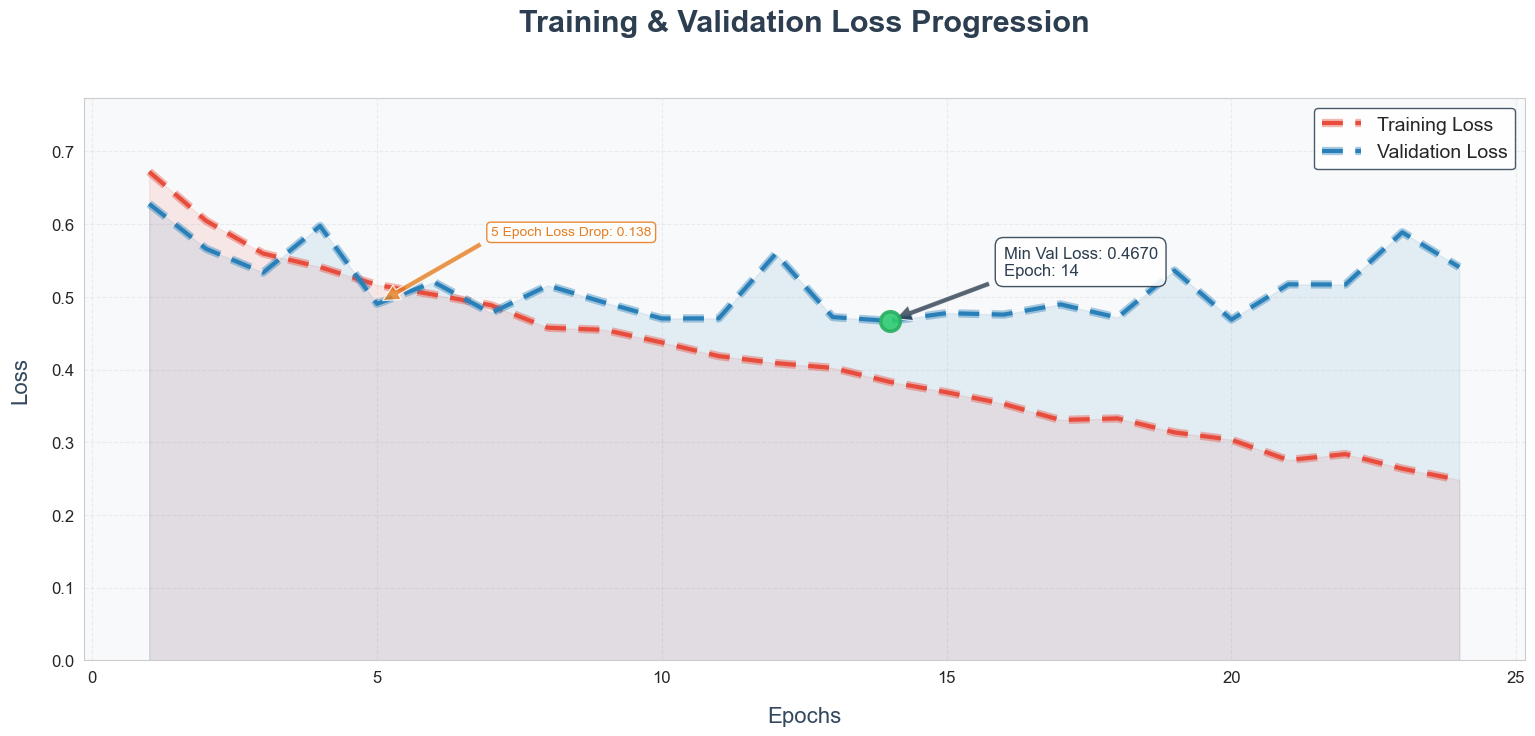

In [24]:
# Style and graphic settings
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid", {'axes.edgecolor': '.8', 'grid.color': '.8'})

# Access history dictionary using history.history
epochs = range(1, len(history.history["loss"]) + 1)

# Training Loss (with Glow effect)
plt.plot(epochs, history.history["loss"], 
         label="Training Loss", 
         color="#e74c3c", linewidth=3,
         linestyle=(0, (5, 3)), 
         path_effects=[pe.Stroke(linewidth=6, alpha=0.4, foreground='#e74c3c'), pe.Normal()])

# Validation Loss (with Glow effect)
plt.plot(epochs, history.history["val_loss"], 
         label="Validation Loss", 
         color="#2980b9", linewidth=3,
         linestyle=(0, (5, 3)),
         path_effects=[pe.Stroke(linewidth=6, alpha=0.4, foreground='#2980b9'), pe.Normal()])

# Gradient fill (softer transition)
plt.fill_between(epochs, history.history["loss"], 
                 alpha=0.1, color="#e74c3c", interpolate=True)
plt.fill_between(epochs, history.history["val_loss"], 
                 alpha=0.1, color="#2980b9", interpolate=True)

# Critical point (lowest validation loss)
min_val_loss = min(history.history["val_loss"])
best_epoch = np.argmin(history.history["val_loss"]) + 1  # Epoch number with the lowest validation loss
plt.scatter(best_epoch, min_val_loss, s=200, 
            facecolors='#2ecc71', edgecolors='#27ae60', 
            zorder=9, linewidth=2.5, alpha=0.9)

# Annotation (highlighting the lowest loss)
plt.annotate(f'Min Val Loss: {min_val_loss:.4f}\nEpoch: {best_epoch}', 
             xy=(best_epoch, min_val_loss),
             xytext=(best_epoch + 2, min_val_loss + max(history.history["val_loss"]) * 0.1),
             arrowprops=dict(facecolor='#2c3e50', shrink=0.05, alpha=0.8),
             fontsize=12, color="#2c3e50",
             bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="#2c3e50", alpha=0.9))

# Loss difference for the first few epochs (optional detail)
loss_drop = history.history["val_loss"][0] - history.history["val_loss"][4]
plt.annotate(f'5 Epoch Loss Drop: {loss_drop:.3f}', 
             xy=(5, history.history["val_loss"][4]),
             xytext=(5 + 2, history.history["val_loss"][4] + max(history.history["val_loss"]) * 0.15),
             arrowprops=dict(facecolor='#e67e22', shrink=0.05, alpha=0.8),
             fontsize=10, color="#e67e22",
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#e67e22", alpha=0.9))

# Style settings
plt.title("Training & Validation Loss Progression\n", 
          fontsize=22, pad=25, color="#2c3e50", fontweight="bold")
plt.xlabel("Epochs", fontsize=16, labelpad=15, color="#34495e")
plt.ylabel("Loss", fontsize=16, labelpad=15, color="#34495e")
plt.legend(loc='upper right', fontsize=14, framealpha=0.9, edgecolor='#34495e')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_facecolor('#f8f9fa')
plt.ylim(0, max(max(history.history["val_loss"]), max(history.history["loss"])) * 1.15)  # For better visibility
plt.grid(True, alpha=0.3, linestyle='--')

# Layout and spacing
plt.tight_layout(pad=3.0)

# Saving the figure
plt.savefig("results/training_and_validation_loss_progression.png")

# Display the plot
plt.show()


1/1 [==============================] - 0s 179ms/step


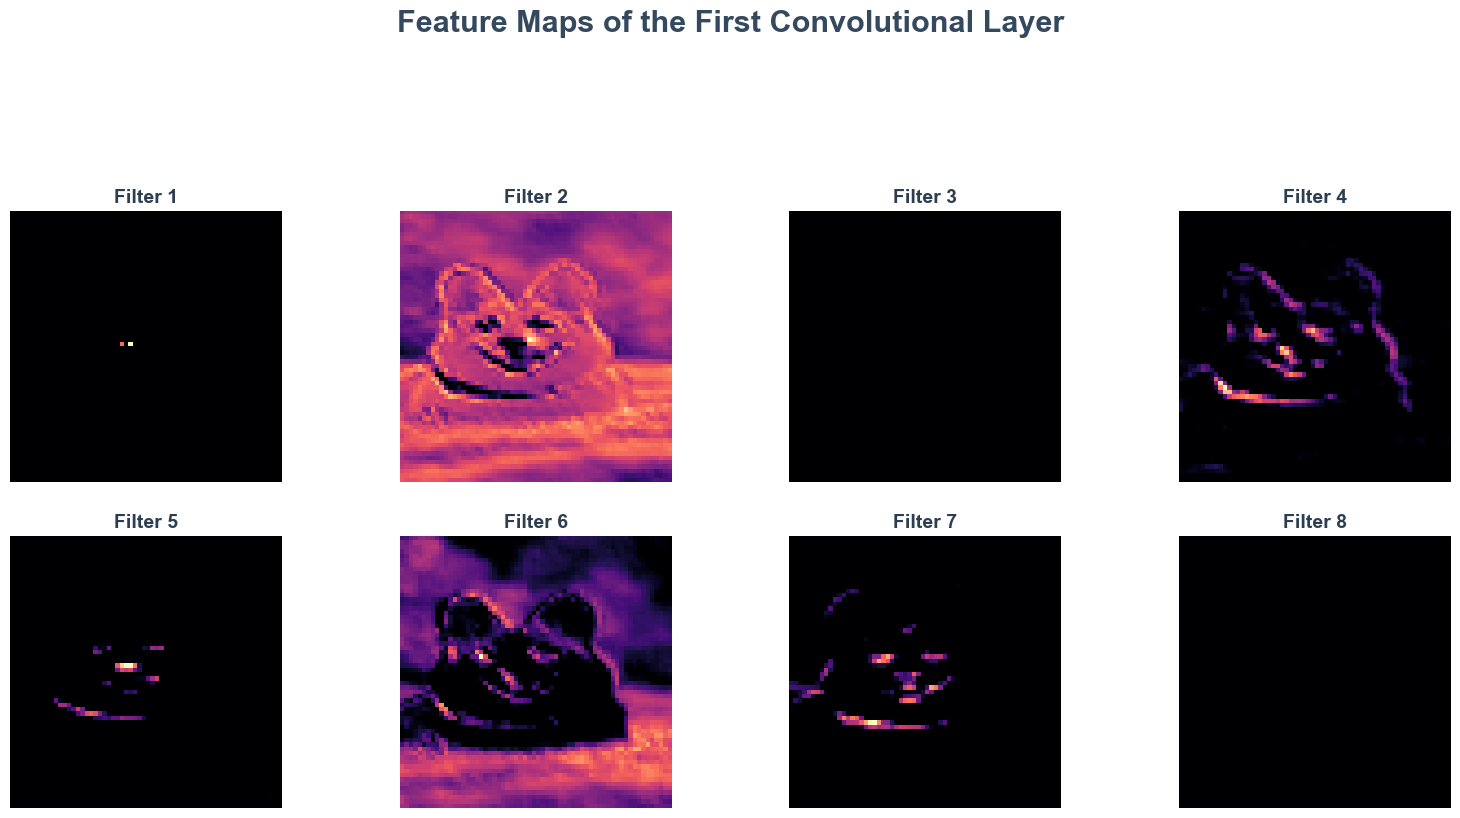

In [25]:
from tensorflow.keras.models import Model

# Get the output of the first Conv layer
layer_outputs = [layer.output for layer in cnn.layers if isinstance(layer, tf.keras.layers.Conv2D)]
activation_model = Model(inputs=cnn.input, outputs=layer_outputs[0])

# Example image
test_image = image.load_img("dataset/single_prediction/dog.jpg", target_size=(64, 64))
test_image = image.img_to_array(test_image) / 255.0
test_image = np.expand_dims(test_image, axis=0)
activations = activation_model.predict(test_image)

# Plotting
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.alpha': 0.4})

# Visualizing feature maps
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(activations[0, :, :, i], cmap='magma')
    plt.title(f'Filter {i+1}', fontsize=14, color="#2c3e50", fontweight="bold")
    plt.axis('off')

# Title and general layout adjustments
plt.suptitle("Feature Maps of the First Convolutional Layer\n", 
             fontsize=22, color="#34495e", fontweight="bold", y=1.05)
plt.tight_layout(pad=3.0)
plt.savefig("results/feature_map.png")
plt.show()